In [1]:
# first install nltk : https://anaconda.org/anaconda/nltk
# then install the additional data: https://www.nltk.org/data.html
# nltk.download()

In [2]:
# import library
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [3]:
# bring in the CSV and take a look at it
df = pd.read_csv('data/airbnb-listings.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31900 non-null  int64  
 1   listing_url                                   31900 non-null  object 
 2   scrape_id                                     31900 non-null  int64  
 3   last_scraped                                  31900 non-null  object 
 4   name                                          31899 non-null  object 
 5   description                                   30751 non-null  object 
 6   neighborhood_overview                         20185 non-null  object 
 7   picture_url                                   31900 non-null  object 
 8   host_id                                       31900 non-null  int64  
 9   host_url                                      31900 non-null 

In [4]:
# trying out this code from stack overflow: https://stackoverflow.com/questions/40206249/count-of-most-popular-words-in-a-pandas-dataframe
# https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist

In [58]:
top_N = 20
newStopWords = ['<','>','/','br',',','.','b','/b','space','room','!','private','access','kitchen',')','guest','(','&','bedroom','house','apartment','home','bed','2','living','located','-','bathroom',"*",'one','\'s',':','full','la','note','1','large','\'','\‘','\’','\'m','—','los angeles']

In [61]:
def wordbarchart(txt):
    words = nltk.tokenize.word_tokenize(txt)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(newStopWords)
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    ax = rslt.plot.bar(color="deeppink", stacked=True)

<ipython-input-54-9657022032a3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = df.description.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


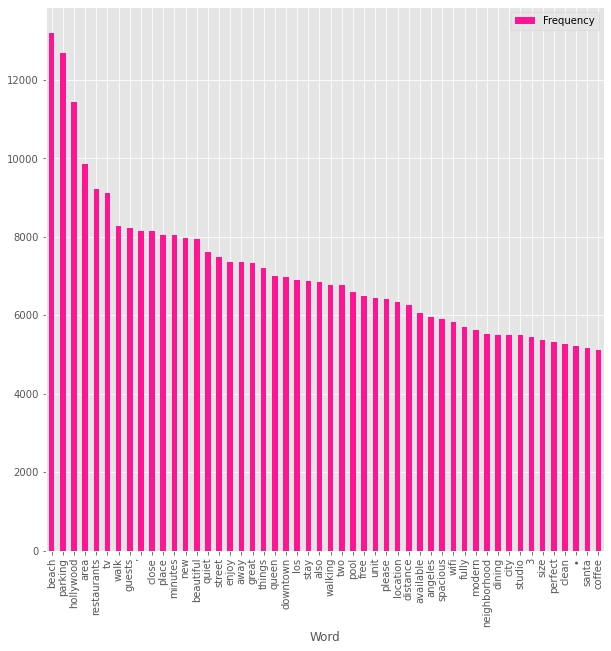

In [54]:
txt = df.description.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')    
wordbarchart(txt)

<ipython-input-55-387853142b56>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = df.neighborhood_overview.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


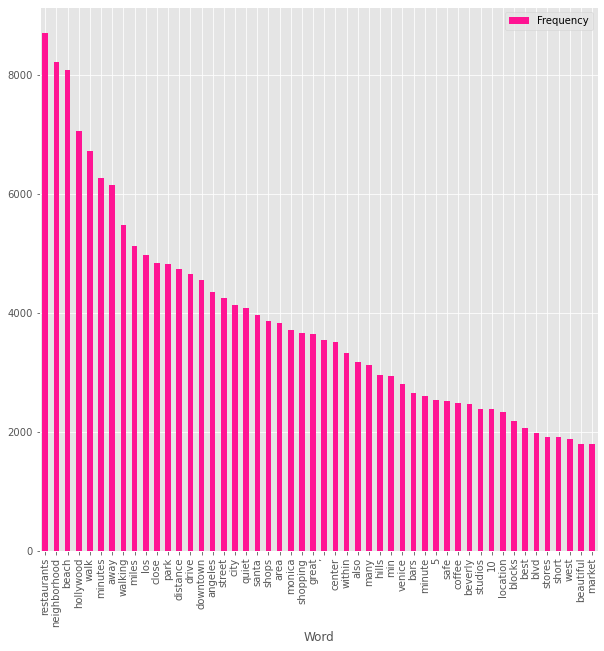

In [55]:
txt = df.neighborhood_overview.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')    
wordbarchart(txt)

<ipython-input-46-bc58a3f33f31>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = df.host_about.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


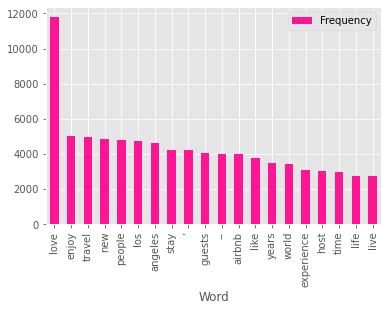

In [46]:
txt = df.host_about.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')    
wordbarchart(txt)

# Filtered CSV

processing the filtered csv, see the other notebook for the process to get this filtered list

In [48]:
# bring in the CSV and take a look at it
df_filtered = pd.read_csv('data/join_list_gent.csv')
df_filtered.head(10)

,id,listing_url,scrape_id,last_scraped,name_left,description,neighborhood_overview,picture_url,host_id,host_url,...,location,longitude_right,name_right,name_1,set,slug,slug_1,sqmi,type,Score
0,19887,https://www.airbnb.com/rooms/19887,20210207181900,2021-02-10,Eco-friendly Private Room in Silverlake House,"One block from Sqirl, the best new restaurant ...",NaN,https://a0.muscache.com/pictures/f878d518-eaf9...,75052,https://www.airbnb.com/users/show/75052,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
1,321179,https://www.airbnb.com/rooms/321179,20210207181900,2021-02-09,Charming Silver Lake Bungalow,<b>The space</b><br />This is a charming urban...,NaN,https://a0.muscache.com/pictures/19736021/dea3...,1645296,https://www.airbnb.com/users/show/1645296,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
2,543730,https://www.airbnb.com/rooms/543730,20210207181900,2021-02-09,Detached Guesthouse with Pool,<b>The space</b><br />Detached guesthouse with...,NaN,https://a0.muscache.com/pictures/7242003/ab1ad...,2671126,https://www.airbnb.com/users/show/2671126,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
3,809072,https://www.airbnb.com/rooms/809072,20210207181900,2021-02-09,Beautiful & Spacious + Near Metro,This charming and spacious apartment offers a ...,"This is a friendly neighborhood, Virgil Villag...",https://a0.muscache.com/pictures/40749731/6e5a...,3504928,https://www.airbnb.com/users/show/3504928,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
4,1040399,https://www.airbnb.com/rooms/1040399,20210207181900,2021-02-10,Cozy Pool House in Los Angeles.,The Pool house is a one bedroom located at the...,The house is walking distance from the Vista ...,https://a0.muscache.com/pictures/b33e2ffe-923c...,1136148,https://www.airbnb.com/users/show/1136148,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
5,1170934,https://www.airbnb.com/rooms/1170934,20210207181900,2021-02-09,A large entire apt. to yourself w/parking!,This is a large and comfortable one bedroom ap...,"The neighborhood has coffee shops, theaters, g...",https://a0.muscache.com/pictures/72184974/69d7...,839239,https://www.airbnb.com/users/show/839239,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
6,1255823,https://www.airbnb.com/rooms/1255823,20210207181900,2021-02-09,HUGE HOLLYWOOD ARTIST LOFT,"1500 sq ft, Originally built as a movie set. T...",The outside street appearance is not exactly b...,https://a0.muscache.com/pictures/62755924/051a...,6200103,https://www.airbnb.com/users/show/6200103,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
7,1360031,https://www.airbnb.com/rooms/1360031,20210207181900,2021-02-09,Modern 1bd bungalow available for holiday rental.,I'm a gay male who is an actor and film maker ...,This neighborhood is very close to hollywood a...,https://a0.muscache.com/pictures/20509191/3a7a...,2617624,https://www.airbnb.com/users/show/2617624,...,POINT(34.089109499123481 -118.2968085),34.089109,East Hollywood,NaN,L.A. County Neighborhoods (Current),east-hollywood,NaN,2.378736,segment-of-a-city,13.0
8,1446428,https://www.airbnb.com/rooms/1446428,20210207181900,2021-02-09,Private cozy cottage in Los Angeles,"Excellent location with easy access, to Hollyw...",It is a big city.<br />There are apartment bui.

<ipython-input-62-8d693ab4eeb6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = df_filtered.description.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


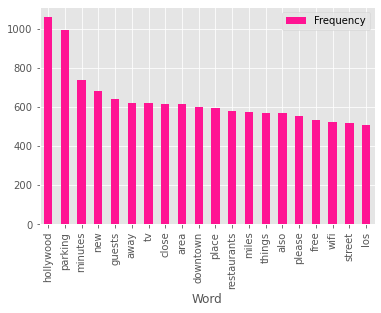

In [62]:
txt = df_filtered.description.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')    
wordbarchart(txt)

<ipython-input-63-f857e6c8caa5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = df_filtered.neighborhood_overview.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


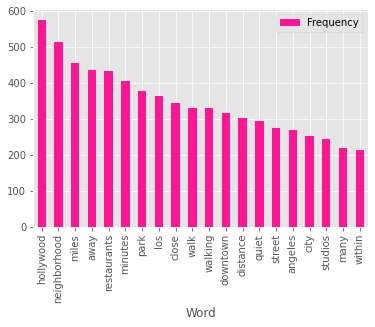

In [63]:
txt = df_filtered.neighborhood_overview.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')    
wordbarchart(txt)